Introduction

What is a Kidney Stone?

Kidney stones (also called renal calculi, nephrolithiasis or urolithiasis) are hard deposits made of minerals and salts
that form inside your kidneys. Diet, excess body weight, some medical conditions, and certain supplements and medications 
are among the many causes of kidney stones

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [7]:
df = pd.read_csv(r"C:\Users\kaush\Downloads\dataset\kidney_stone_data.csv")

In [8]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,414.0,206.500000,119.655756,0.000,103.250,206.500,309.750,413.00
gravity,414.0,1.017894,0.006675,1.005,1.012,1.018,1.022,1.04
ph,414.0,5.955459,0.642260,4.760,5.530,5.740,6.280,7.94
osmo,414.0,651.545894,234.676567,187.000,455.250,679.500,840.000,1236.00
cond,414.0,21.437923,7.514750,5.100,15.500,22.200,27.600,38.00
urea,414.0,278.657005,136.442249,10.000,170.000,277.000,385.000,620.00
calc,414.0,4.114638,3.217641,0.170,1.450,3.130,6.630,14.34
target,414.0,0.444444,0.497505,0.000,0.000,0.000,1.000,1.00


In [10]:
df.shape

(414, 8)

In [11]:
cols = df.columns
cols

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

#### Let's Study Risk and What is the Play of above Features in predicting the Stone in kidney

Physical chemistry plays a significant role in understanding and explaining various aspects of kidney stones. In the context of kidney stones, the contributions of physical chemistry can be seen in relation to osmolarity, conductivity, urea concentration, and calcium concentration. Let's explore these contributions further:

1. Osmolarity: Osmolarity refers to the concentration of molecules in a solution. In the case of kidney stones, osmolarity plays a role in the formation and growth of stones. When the concentration of certain substances, such as calcium, oxalate, and uric acid, exceeds their solubility limits in urine, these substances can precipitate and form crystals. The osmolarity of urine affects the supersaturation level of these substances and, consequently, their potential to crystallize and contribute to the formation of kidney stones.

2. Conductivity: Conductivity is a measure of how well a solution conducts electric current and is influenced by the concentration of charged ions in the solution. In the context of kidney stones, conductivity can be related to the presence of dissolved ions, such as calcium, oxalate, phosphate, and urate. Higher concentrations of these ions can increase the electrical conductivity of urine, which may indicate an increased risk for stone formation. Conductivity measurements can provide valuable information about the ionic composition of urine and aid in diagnosing and monitoring kidney stone patients.
3. Urea Concentration: Urea is a waste product formed in the liver from the breakdown of proteins and is excreted in urine. Its concentration in urine can impact kidney stone formation. Urea acts as a solute and contributes to the osmotic pressure and osmolarity of urine. Higher urea concentrations can affect the solubility of other substances, potentially leading to stone formation. Understanding the urea concentration in urine can help assess the risk of stone formation and guide preventive measures.

4. 
Calcium Concentration: Calcium is a critical component in the formation of certain types of kidney stones, particularly calcium oxalate and calcium phosphate stones. Physical chemistry plays a role in understanding the solubility of calcium in urine and factors influencing its precipitation as crystals. Elevated calcium concentrations in urine can result from various factors, such as increased intestinal absorption or impaired calcium reabsorption in the kidneys. Understanding the calcium concentration is essential for evaluating the risk of calcium-based stone formation and implementing appropriate preventive strategie
5. The specific gravity of urine is a measurement that indicates the concentration of dissolved substances in urine compared to pure water. It is typically used to assess the concentration and dilution of urine and can provide valuable information about kidney function and potential kidney stone formation.
6. The pH of urine is influenced by the presence of different substances and can affect the solubility of certain compounds.
 ds.
 



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


<Axes: title={'center': 'Target Count'}, xlabel='target', ylabel='count'>

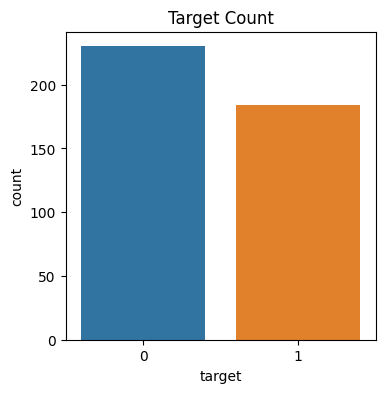

In [13]:
plt.figure(figsize = (4,4))
plt.title("Target Count")
sns.countplot(x=df['target'])

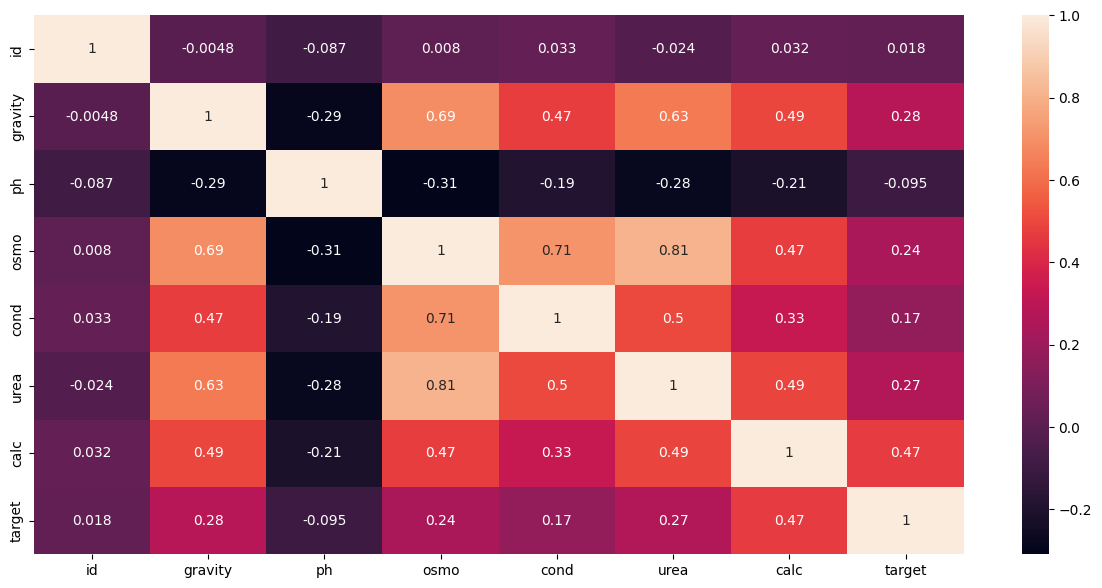

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

<Axes: xlabel='gravity'>

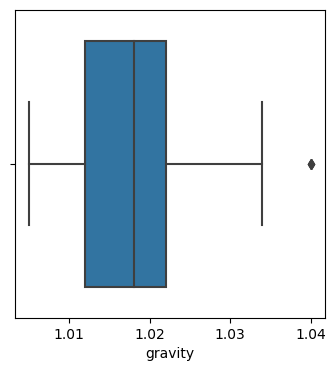

In [15]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['gravity'])

<Axes: xlabel='ph'>

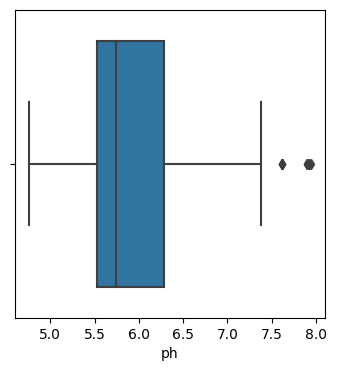

In [16]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['ph'])

<Axes: xlabel='osmo'>

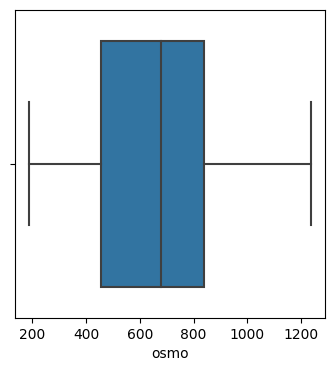

In [17]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['osmo'])

<Axes: xlabel='cond'>

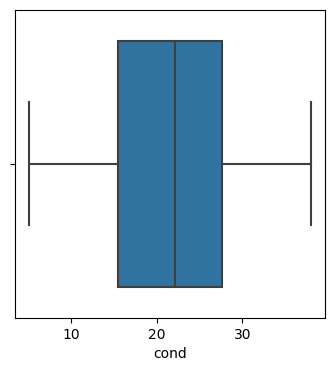

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['cond'])

<Axes: xlabel='urea'>

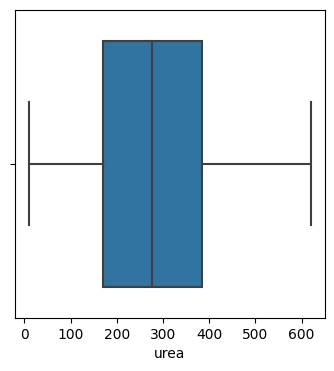

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['urea'])

<Axes: xlabel='calc'>

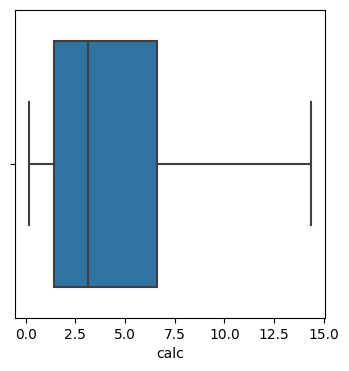

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(x = df['calc'])

In [21]:
def handling_outliers(data):
    factor = 1.5
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    lower_bound = q1 - (factor* iqr)
    upper_bound = q3 + (factor* iqr)

    treated_data = data.copy()
    treated_data[(data < lower_bound) | (data> upper_bound)] = np.NAN

    return treated_data

In [22]:
treated_data = handling_outliers(df)

In [23]:
treated_data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443.0,14.8,124.0,1.45,0
1,1,1.025,5.40,NaN,23.6,394.0,4.18,0
2,2,1.009,6.13,371.0,24.5,159.0,9.04,0
3,3,1.021,4.91,442.0,20.8,398.0,6.63,1
4,4,1.021,5.53,NaN,17.8,385.0,2.21,1


In [24]:
treated_data.isna().sum()

id           0
gravity      0
ph           0
osmo       255
cond         0
urea        10
calc         0
target       0
dtype: int64

In [25]:
imputer = KNNImputer(n_neighbors = 5)
imputed_data = imputer.fit_transform(treated_data)

In [26]:
imputed_df = pd.DataFrame(imputed_data,columns=cols)

In [27]:
imputed_df.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [28]:
imputed_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0.0,1.013,6.19,443.0,14.8,124.0,1.45,0.0
1,1.0,1.025,5.40,442.0,23.6,394.0,4.18,0.0
2,2.0,1.009,6.13,371.0,24.5,159.0,9.04,0.0
3,3.0,1.021,4.91,442.0,20.8,398.0,6.63,1.0
4,4.0,1.021,5.53,442.0,17.8,385.0,2.21,1.0


In [29]:
x = imputed_df.drop(columns=['id','target'])
y = imputed_df['target'].astype(int)

In [30]:
x.head()

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443.0,14.8,124.0,1.45
1,1.025,5.40,442.0,23.6,394.0,4.18
2,1.009,6.13,371.0,24.5,159.0,9.04
3,1.021,4.91,442.0,20.8,398.0,6.63
4,1.021,5.53,442.0,17.8,385.0,2.21


In [31]:
x.shape

(414, 6)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25)

In [33]:
x_train.head()

,gravity,ph,osmo,cond,urea,calc
64,1.022,5.96,442.0,20.6,398.0,4.49
197,1.010,7.38,381.6,25.7,75.0,2.31
255,1.025,7.90,508.0,23.6,301.0,12.20
365,1.007,5.94,241.0,5.1,159.0,1.53
83,1.014,5.85,386.0,17.7,104.0,3.46


In [34]:
x_train.shape

(310, 6)

In [35]:
cols = ['gravity','ph','osmo','cond','urea','calc']

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
ssc = StandardScaler()

In [38]:

x_train = ssc.fit_transform(x_train)
x_test = ssc.transform(x_test)

In [39]:
scaled_xtrain = pd.DataFrame(x_train,columns = cols)

In [40]:
scaled_xtrain.head()

,gravity,ph,osmo,cond,urea,calc
0,0.662394,-0.014840,-0.091704,-0.087925,1.046056,0.134810
1,-1.168293,2.177352,-0.830422,0.577191,-1.549680,-0.547981
2,1.120065,2.980127,0.715503,0.303320,0.266532,2.549636
3,-1.625965,-0.045716,-2.550018,-2.109357,-0.874628,-0.792282
4,-0.558064,-0.184658,-0.776608,-0.466128,-1.316626,-0.187793


In [41]:
scaled_xtest = pd.DataFrame(x_test,columns = cols)

In [42]:
scaled_xtest.head()

,gravity,ph,osmo,cond,urea,calc
0,1.120065,0.510051,0.194487,0.420693,1.021947,-0.591830
1,0.967508,-0.539732,0.194487,0.824980,1.994344,0.977337
2,-1.320850,0.618117,0.519816,1.294474,-0.231721,-0.795414
3,2.493080,-0.601483,-0.108827,-0.048800,-0.858555,-0.281755
4,0.509836,-0.817615,0.502694,1.007561,0.459404,0.908431


In [43]:
rfc = RandomForestClassifier()
lrc = LogisticRegression()
xgbc = XGBClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
svc = SVC()
knnc =  KNeighborsClassifier()
gbc = GradientBoostingClassifier()

In [44]:
MM = [rfc,lrc,xgbc,gnb,dtc,svc,knnc,gbc]

In [45]:
a={'Model_Name':[], 'Accuracy_Score':[] ,'F1_score':[] ,'False_Negative':[] }


In [46]:
a={'Model_Name':[], 'Accuracy_Score':[] ,'F1_score':[] ,'False_Negative':[] }
for models in MM:

    print("*"*50)
    # Fit the model with train data
    
    models.fit(scaled_xtrain, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(scaled_xtest)
    
    # Print the model name
    
    print('Model Name: ', models)

    print("Accuracy Score :",accuracy_score(y_test,y_pred))

    print("F1 score :", f1_score(y_test,y_pred))

    print("False Negative :",confusion_matrix(y_test,y_pred)[1][0])

    a['Model_Name'].append(models)
    a['Accuracy_Score'].append(accuracy_score(y_test,y_pred))
    a['F1_score'].append(f1_score(y_test,y_pred))
    a['False_Negative'].append(confusion_matrix(y_test,y_pred)[1][0])

**************************************************
Model Name:  RandomForestClassifier()
Accuracy Score : 0.7596153846153846
F1 score : 0.7058823529411765
False Negative : 13
**************************************************
Model Name:  LogisticRegression()
Accuracy Score : 0.7692307692307693
F1 score : 0.7000000000000001
False Negative : 15
**************************************************
Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, m

In [47]:
Results= pd.DataFrame(a)
Results

,Model_Name,Accuracy_Score,F1_score,False_Negative
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.759615,0.705882,13
1,LogisticRegression(),0.769231,0.700000,15
2,"XGBClassifier(base_score=None, booster=None, c...",0.682692,0.611765,17
3,GaussianNB(),0.711538,0.705882,7
4,DecisionTreeClassifier(),0.509615,0.413793,25
5,SVC(),0.788462,0.738095,12
6,KNeighborsClassifier(),0.759615,0.705882,13
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.701923,0.635294,16


In [52]:
from sklearn.model_selection import GridSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]

# max_features = ['auto', 'sqrt']

# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# min_samples_split = [2, 5, 10]

# min_samples_leaf = [1, 2, 4]

# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']} 

In [53]:
svc = SVC()

svc_grid = GridSearchCV(estimator = svc, param_grid  = param_grid,   verbose=2,  n_jobs = -1)

svc_grid.fit(scaled_xtrain, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=2)

In [54]:
svc.fit(scaled_xtrain,y_train)

SVC()

In [55]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [56]:
y_pred = svc.predict(x_test)

C:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [57]:
confusion_matrix(y_test,y_pred)

array([[51, 10],
       [12, 31]], dtype=int64)

In [58]:
accuracy_score(y_pred,y_test)

0.7884615384615384

In [59]:
f1_score(y_test,y_pred)

0.7380952380952381